<a href="https://colab.research.google.com/github/jodogwu/Projects-Machine/blob/main/Brain_Tumor_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import Necessary libraries**

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd


### **Load DataSet**

In [ ]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the Brain Tumor dataset from Google Drive

no = ['/content/drive/My Drive/brain_tumor_dataset/no']
yes = ['/content/drive/My Drive/brain_tumor_dataset/yes']
file_p = []
labels = []
dict_lists = [no, yes]
class_labels = ['no', 'yes']

In [ ]:
# Iterate over directories and files

for i, dir_list in enumerate(dict_lists):
     for j in dir_list:
            list_f = os.listdir(j)
            for name in list_f:
                fpath = os.path.join(j, name)
                file_p.append(fpath)
                labels.append(class_labels[i])


failpath = pd.Series(file_p, name="filepaths")
Labelss = pd.Series(labels, name="labels")
data = pd.concat([failpath, Labelss], axis=1)
df = pd.DataFrame(data)


In [ ]:
df.head()

,filepaths,labels
0,/content/drive/My Drive/brain_tumor_dataset/no...,no
1,/content/drive/My Drive/brain_tumor_dataset/no...,no
2,/content/drive/My Drive/brain_tumor_dataset/no...,no
3,/content/drive/My Drive/brain_tumor_dataset/no...,no
4,/content/drive/My Drive/brain_tumor_dataset/no...,no


In [ ]:
df.tail()

,filepaths,labels
248,/content/drive/My Drive/brain_tumor_dataset/ye...,yes
249,/content/drive/My Drive/brain_tumor_dataset/ye...,yes
250,/content/drive/My Drive/brain_tumor_dataset/ye...,yes
251,/content/drive/My Drive/brain_tumor_dataset/ye...,yes
252,/content/drive/My Drive/brain_tumor_dataset/ye...,yes


### **Exploratory Data Analysis**

In [ ]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)

                                                filepaths labels
count                                                 253    253
unique                                                253      2
top     /content/drive/My Drive/brain_tumor_dataset/no...    yes
freq                                                    1    155


In [ ]:
# Frequency distribution of labels
label_counts = df['labels'].value_counts()
print(label_counts)

labels
yes    155
no      98
Name: count, dtype: int64


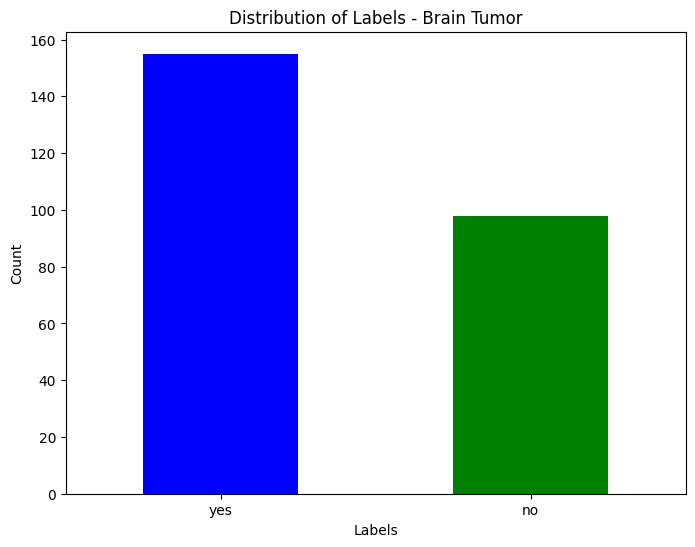

In [ ]:
# Data Distribution
import matplotlib.pyplot as plt

# Bar plot of label distribution
plt.figure(figsize=(8, 6))
df['labels'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of Labels - Brain Tumor')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

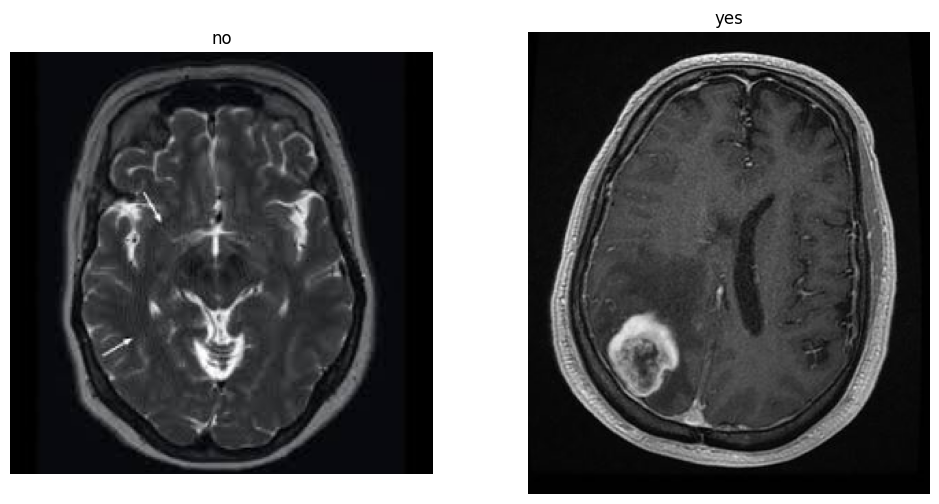

In [ ]:
import matplotlib.pyplot as plt
import random

# File paths
no_paths = ['/content/drive/My Drive/brain_tumor_dataset/no']
yes_paths = ['/content/drive/My Drive/brain_tumor_dataset/yes']

# Randomly select and display MRI images with labels
sample_images = []
for path_list, label in zip([no_paths, yes_paths], ['no', 'yes']):
    for path in path_list:
        files = os.listdir(path)
        selected_file = random.choice(files)
        file_path = os.path.join(path, selected_file)
        sample_images.append((file_path, label))

plt.figure(figsize=(12, 6))
for i, (file_path, label) in enumerate(sample_images):
    image = plt.imread(file_path)
    plt.subplot(1, len(sample_images), i+1)
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.show()

### **Image Visualization**

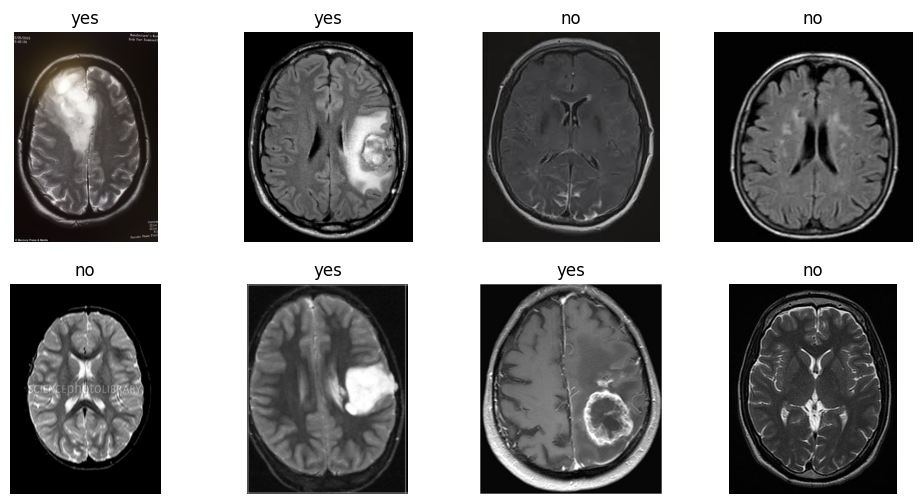

In [ ]:
import matplotlib.pyplot as plt
import random
import os

# File paths
no_paths = ['/content/drive/My Drive/brain_tumor_dataset/no']
yes_paths = ['/content/drive/My Drive/brain_tumor_dataset/yes']

# Function to randomly select samples from each class
def select_samples(paths, label, num_samples=4):
    samples = []
    for path in paths:
        files = os.listdir(path)
        selected_files = random.sample(files, num_samples)
        samples.extend([(os.path.join(path, file), label) for file in selected_files])
    return samples

# Select 4 samples from each class
no_samples = select_samples(no_paths, 'no', num_samples=4)
yes_samples = select_samples(yes_paths, 'yes', num_samples=4)

# Combine samples from both classes
all_samples = no_samples + yes_samples
random.shuffle(all_samples)

# Display MRI images with labels
plt.figure(figsize=(12, 6))
for i, (file_path, label) in enumerate(all_samples):
    image = plt.imread(file_path)
    plt.subplot(2, 4, i+1)
    plt.imshow(image, cmap='gray')
    plt.title(label)
    plt.axis('off')
plt.show()

count               253
unique              190
top       (225, 225, 3)
freq                 17
Name: filepaths, dtype: object


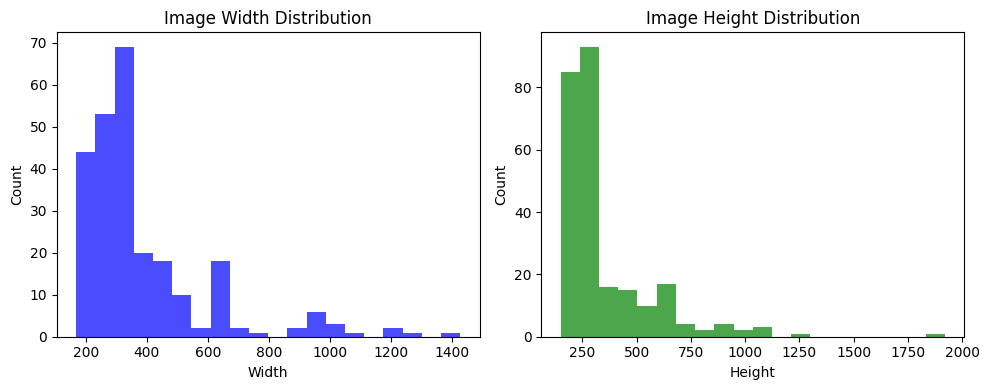

In [ ]:
# Analyze image dimensions
image_dimensions = df['filepaths'].apply(lambda x: plt.imread(x).shape)
print(image_dimensions.describe())

# Plot histograms of image dimensions
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(image_dimensions.str[0], bins=20, color='blue', alpha=0.7)
plt.title('Image Width Distribution')
plt.xlabel('Width')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
plt.hist(image_dimensions.str[1], bins=20, color='green', alpha=0.7)
plt.title('Image Height Distribution')
plt.xlabel('Height')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


### **Data Preprocessing**

In [ ]:
# Resizing Image
import cv2
import os

# File paths
no_paths = ['/content/drive/My Drive/brain_tumor_dataset/no']
yes_paths = ['/content/drive/My Drive/brain_tumor_dataset/yes']

# Function to load images from directory paths
def load_images_from_paths(paths):
    images = []
    for path in paths:
        for file_name in os.listdir(path):
            file_path = os.path.join(path, file_name)
            image = cv2.imread(file_path)
            images.append(image)
    return images

# Load images from file paths
no_images = load_images_from_paths(no_paths)
yes_images = load_images_from_paths(yes_paths)

# Define target size
target_size = (256, 256)

# Resize images
resized_no_images = [cv2.resize(image, target_size) for image in no_images]
resized_yes_images = [cv2.resize(image, target_size) for image in yes_images]


In [ ]:
# Function to load and normalize images from directory paths
def load_and_normalize_images(paths):
    normalized_images = []
    for path in paths:
        for file_name in os.listdir(path):
            file_path = os.path.join(path, file_name)
            image = cv2.imread(file_path)
            # Resize image
            image = cv2.resize(image, target_size)
            # Normalize pixel values
            image_normalized = image / 255.0
            normalized_images.append(image_normalized)
    return normalized_images

# Load and normalize images from file paths
normalized_no_images = load_and_normalize_images(no_paths)
normalized_yes_images = load_and_normalize_images(yes_paths)

Epoch 1/40
12/12 [==============================] - 28s 2s/step - loss: 1.3467 - accuracy: 0.6067 - val_loss: 0.7339 - val_accuracy: 0.5600
Epoch 2/40
12/12 [==============================] - 26s 2s/step - loss: 0.5027 - accuracy: 0.7978 - val_loss: 0.6737 - val_accuracy: 0.7200
Epoch 3/40
12/12 [==============================] - 34s 3s/step - loss: 0.3795 - accuracy: 0.8596 - val_loss: 0.6248 - val_accuracy: 0.7600
Epoch 4/40
12/12 [==============================] - 27s 2s/step - loss: 0.1936 - accuracy: 0.9382 - val_loss: 0.8237 - val_accuracy: 0.7200
Epoch 5/40
12/12 [==============================] - 24s 2s/step - loss: 0.1688 - accuracy: 0.9551 - val_loss: 0.6355 - val_accuracy: 0.8000
Epoch 6/40
12/12 [==============================] - 26s 2s/step - loss: 0.0899 - accuracy: 0.9551 - val_loss: 0.9835 - val_accuracy: 0.8400
Epoch 7/40
12/12 [==============================] - 26s 2s/step - loss: 0.0471 - accuracy: 0.9831 - val_loss: 1.2407 - val_accuracy: 0.8400
Epoch 8/40
12/12 [==

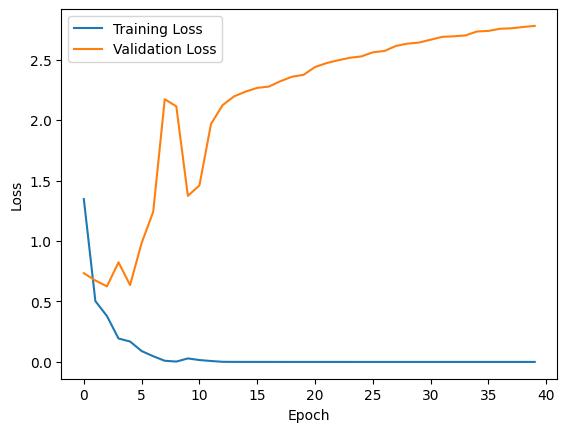

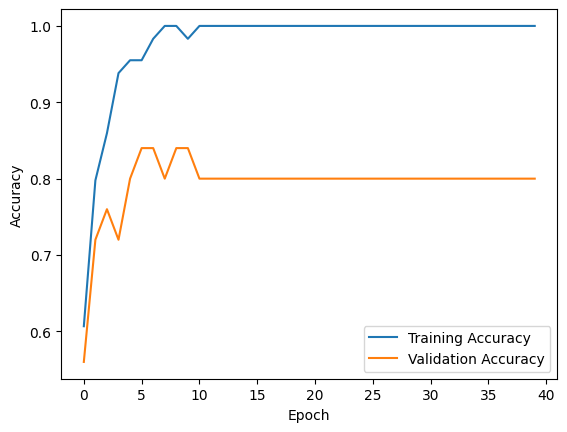

Training Loss: 1.056208748195786e-05
Training Accuracy: 1.0
Validation Loss: 2.7785425186157227
Validation Accuracy: 0.800000011920929
2/2 [==============================] - 3s 919ms/step - loss: 1.5616 - accuracy: 0.9000
Test Loss: 1.5616350173950195
Test Accuracy: 0.8999999761581421


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Assuming you have loaded and preprocessed your data into normalized_no_images and normalized_yes_images

# Combine the data and labels
X = normalized_no_images + normalized_yes_images
y = [0] * len(normalized_no_images) + [1] * len(normalized_yes_images)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Shuffle the data
shuffle_indices = np.arange(len(X))
np.random.shuffle(shuffle_indices)
X = X[shuffle_indices]
y = y[shuffle_indices]

# Split the data into training, validation, and test sets
val_split = int(0.2 * len(X))  # 20% validation split
test_split = int(0.1 * len(X))  # 10% test split
X_train, X_val, X_test = X[val_split+test_split:], X[val_split:val_split+test_split], X[:val_split]
y_train, y_val, y_test = y[val_split+test_split:], y[val_split:val_split+test_split], y[:val_split]

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print final training and validation loss and accuracy
print("Training Loss:", history.history['loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


Epoch 1/40
12/12 [==============================] - 26s 2s/step - loss: 0.6756 - accuracy: 0.6629 - val_loss: 0.6202 - val_accuracy: 0.5600
Epoch 2/40
12/12 [==============================] - 22s 2s/step - loss: 0.5802 - accuracy: 0.6742 - val_loss: 0.5119 - val_accuracy: 0.8000
Epoch 3/40
12/12 [==============================] - 24s 2s/step - loss: 0.5872 - accuracy: 0.6910 - val_loss: 0.4999 - val_accuracy: 0.8400
Epoch 4/40
12/12 [==============================] - 23s 2s/step - loss: 0.5244 - accuracy: 0.7753 - val_loss: 0.5867 - val_accuracy: 0.7200
Epoch 5/40
12/12 [==============================] - 26s 2s/step - loss: 0.4945 - accuracy: 0.8315 - val_loss: 2.3211 - val_accuracy: 0.4400
Epoch 6/40
12/12 [==============================] - 25s 2s/step - loss: 0.7220 - accuracy: 0.6966 - val_loss: 0.9063 - val_accuracy: 0.4800
Epoch 7/40
12/12 [==============================] - 23s 2s/step - loss: 0.5127 - accuracy: 0.7978 - val_loss: 0.4694 - val_accuracy: 0.6800
Epoch 8/40
12/12 [==

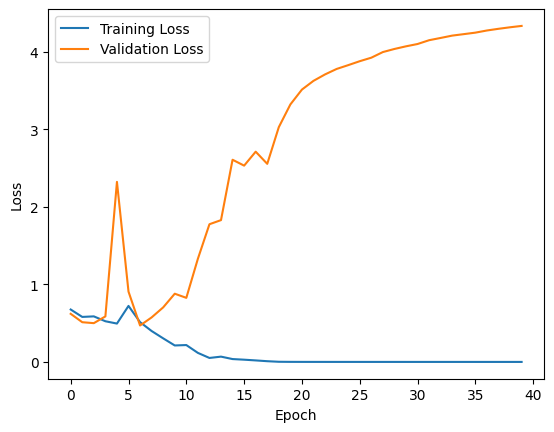

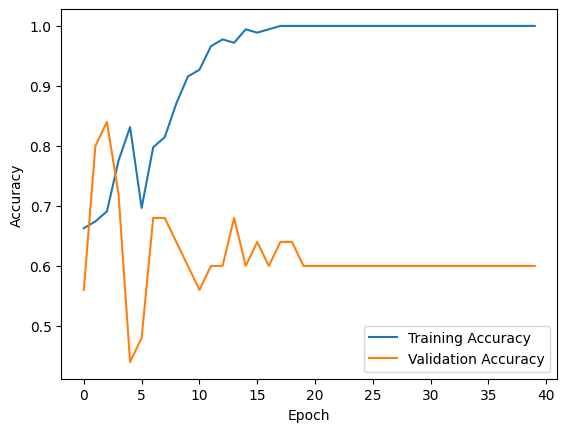

Training Loss: 5.318080366123468e-05
Training Accuracy: 1.0
Validation Loss: 4.33159065246582
Validation Accuracy: 0.6000000238418579
2/2 [==============================] - 2s 895ms/step - loss: 0.6896 - accuracy: 0.8400
Test Loss: 0.6896052360534668
Test Accuracy: 0.8399999737739563


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import SGD

# Assuming you have loaded and preprocessed your data into normalized_no_images and normalized_yes_images

# Combine the data and labels
X = normalized_no_images + normalized_yes_images
y = [0] * len(normalized_no_images) + [1] * len(normalized_yes_images)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Shuffle the data
shuffle_indices = np.arange(len(X))
np.random.shuffle(shuffle_indices)
X = X[shuffle_indices]
y = y[shuffle_indices]

# Split the data into training, validation, and test sets
val_split = int(0.2 * len(X))  # 20% validation split
test_split = int(0.1 * len(X))  # 10% test split
X_train, X_val, X_test = X[val_split+test_split:], X[val_split:val_split+test_split], X[:val_split]
y_train, y_val, y_test = y[val_split+test_split:], y[val_split:val_split+test_split], y[:val_split]

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer
sgd = SGD(learning_rate=0.01, momentum=0.9)  # You can adjust the learning rate and momentum
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print final training and validation loss and accuracy
print("Training Loss:", history.history['loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


Epoch 1/40
12/12 [==============================] - 28s 2s/step - loss: 0.8246 - accuracy: 0.6517 - val_loss: 0.4054 - val_accuracy: 0.8400
Epoch 2/40
12/12 [==============================] - 24s 2s/step - loss: 0.4906 - accuracy: 0.8090 - val_loss: 0.3933 - val_accuracy: 0.9200
Epoch 3/40
12/12 [==============================] - 26s 2s/step - loss: 0.4231 - accuracy: 0.8258 - val_loss: 0.3754 - val_accuracy: 0.9200
Epoch 4/40
12/12 [==============================] - 26s 2s/step - loss: 0.3589 - accuracy: 0.8483 - val_loss: 0.4288 - val_accuracy: 0.8800
Epoch 5/40
12/12 [==============================] - 26s 2s/step - loss: 0.3380 - accuracy: 0.8876 - val_loss: 0.4837 - val_accuracy: 0.8000
Epoch 6/40
12/12 [==============================] - 25s 2s/step - loss: 0.2301 - accuracy: 0.9045 - val_loss: 0.3769 - val_accuracy: 0.8800
Epoch 7/40
12/12 [==============================] - 25s 2s/step - loss: 0.1816 - accuracy: 0.9494 - val_loss: 0.4325 - val_accuracy: 0.8800
Epoch 8/40
12/12 [==

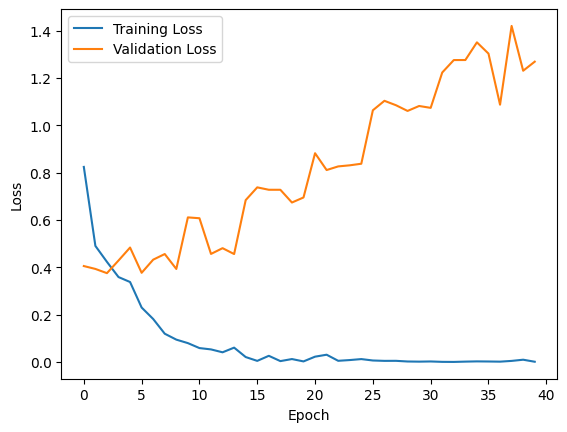

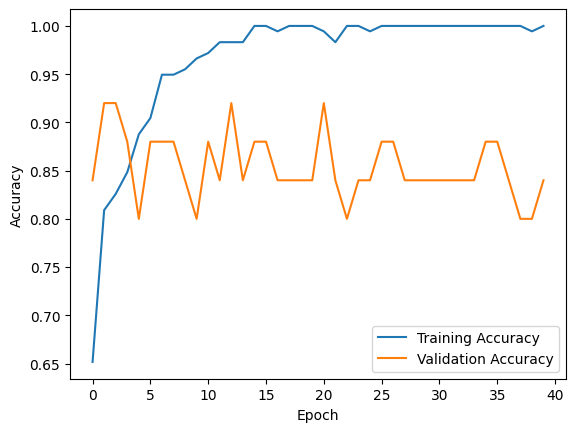

Training Loss: 0.0009014897514134645
Training Accuracy: 1.0
Validation Loss: 1.269500732421875
Validation Accuracy: 0.8399999737739563
2/2 [==============================] - 2s 582ms/step - loss: 0.9221 - accuracy: 0.8600
Test Loss: 0.922111988067627
Test Accuracy: 0.8600000143051147


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming you have loaded and preprocessed your data into normalized_no_images and normalized_yes_images

# Combine the data and labels
X = normalized_no_images + normalized_yes_images
y = [0] * len(normalized_no_images) + [1] * len(normalized_yes_images)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Shuffle the data
shuffle_indices = np.arange(len(X))
np.random.shuffle(shuffle_indices)
X = X[shuffle_indices]
y = y[shuffle_indices]

# Split the data into training, validation, and test sets
val_split = int(0.2 * len(X))  # 20% validation split
test_split = int(0.1 * len(X))  # 10% test split
X_train, X_val, X_test = X[val_split+test_split:], X[val_split:val_split+test_split], X[:val_split]
y_train, y_val, y_test = y[val_split+test_split:], y[val_split:val_split+test_split], y[:val_split]

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Adding dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

# Compile the model with learning rate
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=10000,
    decay_rate=0.96,
    staircase=True)

optimizer = Adam(learning_rate=lr_schedule)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=40, batch_size=16, validation_data=(X_val, y_val))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Print final training and validation loss and accuracy
print("Training Loss:", history.history['loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Assuming you have loaded and preprocessed your data into normalized_no_images and normalized_yes_images

# Combine the data and labels
X = normalized_no_images + normalized_yes_images
y = [0] * len(normalized_no_images) + [1] * len(normalized_yes_images)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Shuffle the data
shuffle_indices = np.arange(len(X))
np.random.shuffle(shuffle_indices)
X = X[shuffle_indices]
y = y[shuffle_indices]

# Split the data into training, validation, and test sets
val_split = int(0.2 * len(X))  # 20% validation split
test_split = int(0.1 * len(X))  # 10% test split
X_train, X_val, X_test = X[val_split+test_split:], X[val_split:val_split+test_split], X[:val_split]
y_train, y_val, y_test = y[val_split+test_split:], y[val_split:val_split+test_split], y[:val_split]

# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)


Epoch 1/10
6/6 [==============================] - 29s 4s/step - loss: 1.9681 - accuracy: 0.5056 - val_loss: 0.6804 - val_accuracy: 0.4000
Epoch 2/10
6/6 [==============================] - 26s 4s/step - loss: 0.6590 - accuracy: 0.5787 - val_loss: 0.6472 - val_accuracy: 0.7200
Epoch 3/10
6/6 [==============================] - 36s 6s/step - loss: 0.5673 - accuracy: 0.7865 - val_loss: 0.5611 - val_accuracy: 0.8000
Epoch 4/10
6/6 [==============================] - 30s 5s/step - loss: 0.3797 - accuracy: 0.8652 - val_loss: 0.7555 - val_accuracy: 0.7600
Epoch 5/10
6/6 [==============================] - 25s 4s/step - loss: 0.3290 - accuracy: 0.8764 - val_loss: 0.4496 - val_accuracy: 0.8000
Epoch 6/10
6/6 [==============================] - 28s 5s/step - loss: 0.2430 - accuracy: 0.9045 - val_loss: 0.5051 - val_accuracy: 0.8400
Epoch 7/10
6/6 [==============================] - 26s 4s/step - loss: 0.1656 - accuracy: 0.9438 - val_loss: 0.7100 - val_accuracy: 0.8000
Epoch 8/10
6/6 [==================

Epoch 1/10
6/6 [==============================] - 27s 4s/step - loss: 0.0154 - accuracy: 0.9944 - val_loss: 0.6954 - val_accuracy: 0.8000
Epoch 2/10
6/6 [==============================] - 27s 4s/step - loss: 0.0106 - accuracy: 1.0000 - val_loss: 0.5231 - val_accuracy: 0.8000
Epoch 3/10
6/6 [==============================] - 28s 5s/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.6913 - val_accuracy: 0.8000
Epoch 4/10
6/6 [==============================] - 26s 5s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 1.0598 - val_accuracy: 0.8000
Epoch 5/10
6/6 [==============================] - 28s 5s/step - loss: 8.6050e-04 - accuracy: 1.0000 - val_loss: 1.0214 - val_accuracy: 0.8000
Epoch 6/10
6/6 [==============================] - 26s 4s/step - loss: 2.3679e-04 - accuracy: 1.0000 - val_loss: 0.8662 - val_accuracy: 0.8000
Epoch 7/10
6/6 [==============================] - 27s 4s/step - loss: 1.3468e-04 - accuracy: 1.0000 - val_loss: 0.8109 - val_accuracy: 0.8000
Epoch 8/10
6/6 [======

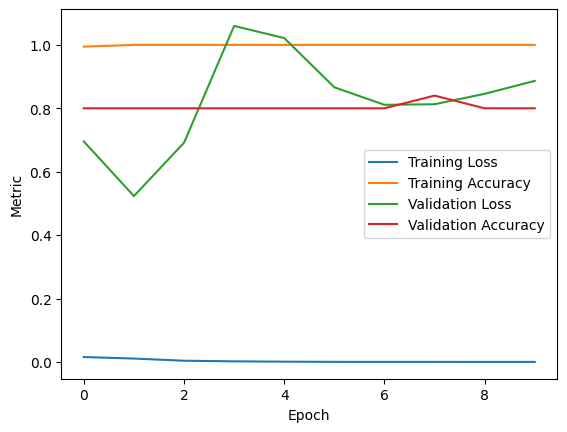

2/2 [==============================] - 3s 1s/step - loss: 2.1604 - accuracy: 0.7800
Test Loss: 2.160404682159424
Test Accuracy: 0.7799999713897705


In [ ]:
import matplotlib.pyplot as plt

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print the performance output after evaluation
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

In [ ]:
# Print the performance output after training
print("Training Loss:", history.history['loss'][-1])
print("Training Accuracy:", history.history['accuracy'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Validation Accuracy:", history.history['val_accuracy'][-1])

# Print the performance output after evaluation
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


Training Loss: 0.03568572923541069
Training Accuracy: 0.9887640476226807
Validation Loss: 0.6614769101142883
Validation Accuracy: 0.8399999737739563
Test Loss: 1.1215968132019043
Test Accuracy: 0.699999988079071


Epoch 1/150
6/6 [==============================] - 29s 5s/step - loss: 1.0699 - accuracy: 0.6180 - val_loss: 0.5846 - val_accuracy: 0.7200
Epoch 2/150
6/6 [==============================] - 29s 5s/step - loss: 0.5278 - accuracy: 0.7978 - val_loss: 0.5500 - val_accuracy: 0.7200
Epoch 3/150
6/6 [==============================] - 25s 4s/step - loss: 0.4117 - accuracy: 0.8315 - val_loss: 0.6928 - val_accuracy: 0.7600
Epoch 4/150
6/6 [==============================] - 27s 4s/step - loss: 0.3999 - accuracy: 0.8371 - val_loss: 0.5158 - val_accuracy: 0.7600
Epoch 5/150
6/6 [==============================] - 27s 5s/step - loss: 0.2960 - accuracy: 0.9045 - val_loss: 0.5812 - val_accuracy: 0.7600
Epoch 6/150
6/6 [==============================] - 29s 5s/step - loss: 0.2336 - accuracy: 0.9213 - val_loss: 0.6577 - val_accuracy: 0.8000
Epoch 7/150
6/6 [==============================] - 25s 4s/step - loss: 0.1879 - accuracy: 0.9326 - val_loss: 0.4865 - val_accuracy: 0.8400
Epoch 8/150
6/6 [==========

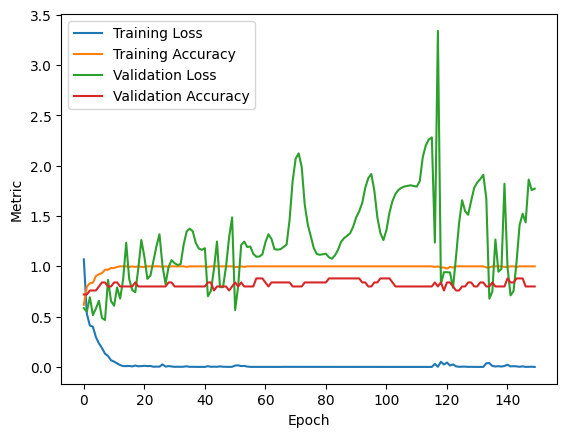

2/2 [==============================] - 2s 639ms/step - loss: 4.5145 - accuracy: 0.7400
Test Loss: 4.514454364776611
Test Accuracy: 0.7400000095367432


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the model architecture with dropout
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Dropout layer with dropout rate 0.5
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout layer with dropout rate 0.5
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a custom learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Set learning rate to 0.001
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model with increased epochs
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_data=(X_val, y_val))

# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print performance metrics
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)
